In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
%matplotlib inline

census = pd.read_csv('census_match.csv')
light_source = pd.read_csv('light_sources.csv')
gdp = pd.read_csv('gdp_match.csv')
lights = pd.read_csv('api_data.csv')

In [265]:
census.head()

,Unnamed: 0,Table Name1,State Code 2,District Code3,Tehsil Code 4,Town Code 5,Area Name 6,Total/ Rural/ Urban7,Total number of households 8,Total number of households availing banking services 9,...,Availability of assets Computer/Laptop Without Internet 13,Availability of assets Telephone/Mobile PhoneLandline only 14,Availability of assets Telephone/Mobile Phone Mobile only 15,Availability of assets Telephone/Mobile Phone Both 16,Availability of assets Bicycle 17,Availability of assets Scooter/ Motorcycle/Moped 18,Availability of assets Car/ Jeep/Van 19,"Availability of assets Households with TV, Computer/Laptop, Telephone/mobile phone and Scooter/ Car 20",Availability of assets None of the assets specified in col.21,new_name
0,706,HH4012,2,30,0,0,District - Bilaspur,Total,80453,68433,...,4707,7650,47001,12284,5387,11397,6573,2779,7043,bilaspur
1,707,HH4012,2,30,0,0,District - Bilaspur,Rural,74661,63213,...,3919,7357,43277,10814,4736,9574,5119,1961,6921,bilaspur
2,708,HH4012,2,30,0,0,District - Bilaspur,Urban,5792,5220,...,788,293,3724,1470,651,1823,1454,818,122,bilaspur
3,894,HH4012,3,35,0,0,District - Gurdaspur,Total,431212,288264,...,24017,50731,235958,49386,280874,194705,32484,26895,19639,gurdaspur
4,895,HH4012,3,35,0,0,District - Gurdaspur,Rural,309898,200737,...,12274,36779,169153,28908,217302,133669,16874,10184,15901,gurdaspur


In [266]:
census = census.drop(census.columns[0:6], axis=1)

census.head()

,Area Name 6,Total/ Rural/ Urban7,Total number of households 8,Total number of households availing banking services 9,Availability of assets Radio/ Transistor 10,Availability of assets Television 11,Availability of assets Computer/Laptop With Internet 12,Availability of assets Computer/Laptop Without Internet 13,Availability of assets Telephone/Mobile PhoneLandline only 14,Availability of assets Telephone/Mobile Phone Mobile only 15,Availability of assets Telephone/Mobile Phone Both 16,Availability of assets Bicycle 17,Availability of assets Scooter/ Motorcycle/Moped 18,Availability of assets Car/ Jeep/Van 19,"Availability of assets Households with TV, Computer/Laptop, Telephone/mobile phone and Scooter/ Car 20",Availability of assets None of the assets specified in col.21,new_name
0,District - Bilaspur,Total,80453,68433,14900,61392,1574,4707,7650,47001,12284,5387,11397,6573,2779,7043,bilaspur
1,District - Bilaspur,Rural,74661,63213,13402,56292,1159,3919,7357,43277,10814,4736,9574,5119,1961,6921,bilaspur
2,District - Bilaspur,Urban,5792,5220,1498,5100,415,788,293,3724,1470,651,1823,1454,818,122,bilaspur
3,District - Gurdaspur,Total,431212,288264,49368,365644,14428,24017,50731,235958,49386,280874,194705,32484,26895,19639,gurdaspur
4,District - Gurdaspur,Rural,309898,200737,35592,255348,5398,12274,36779,169153,28908,217302,133669,16874,10184,15901,gurdaspur


In [267]:
light_source = light_source.drop(light_source.columns[0:6], axis=1)
light_source.head()

,Area Name 6,Main Source of lightingTotal /Rural/Urban 7,Main Source of lighting Total Number of Households 8,Main Source of lighting Electricity 9,Main Source of lighting Kerosene 10,Main Source of lighting Solar energy 11,Main Source of lighting Other oil 12,Main Source of lighting Any other 13,Main Source of lighting No lighting 14,d_name
0,District - Bilaspur,Total,80453,79146,1169,33,24,23,58,bilaspur
1,District - Bilaspur,Rural,74661,73414,1116,30,24,21,56,bilaspur
2,District - Bilaspur,Urban,5792,5732,53,3,NaN,2,2,bilaspur
3,District - Gurdaspur,Total,431212,411216,14380,637,836,767,3376,gurdaspur
4,District - Gurdaspur,Rural,309898,292199,12786,547,701,643,3022,gurdaspur


In [268]:
# function for getting district names from light_source and census dataframes separately

def get_districts(df):
    
    district_list = []

    for i in df[df.columns[0]]:
        l = i.split(' - ')
        if l[0] == 'District' or l[0] == 'Sub-District':
            district_list.append(l[0])
        else:
            district_list.append('NA')
    
    df['district'] = district_list
    return df


In [269]:
light_source = get_districts(light_source)
light_source.head()

,Area Name 6,Main Source of lightingTotal /Rural/Urban 7,Main Source of lighting Total Number of Households 8,Main Source of lighting Electricity 9,Main Source of lighting Kerosene 10,Main Source of lighting Solar energy 11,Main Source of lighting Other oil 12,Main Source of lighting Any other 13,Main Source of lighting No lighting 14,d_name,district
0,District - Bilaspur,Total,80453,79146,1169,33,24,23,58,bilaspur,District
1,District - Bilaspur,Rural,74661,73414,1116,30,24,21,56,bilaspur,District
2,District - Bilaspur,Urban,5792,5732,53,3,NaN,2,2,bilaspur,District
3,District - Gurdaspur,Total,431212,411216,14380,637,836,767,3376,gurdaspur,District
4,District - Gurdaspur,Rural,309898,292199,12786,547,701,643,3022,gurdaspur,District


In [270]:
census = get_districts(census)
census.head()

,Area Name 6,Total/ Rural/ Urban7,Total number of households 8,Total number of households availing banking services 9,Availability of assets Radio/ Transistor 10,Availability of assets Television 11,Availability of assets Computer/Laptop With Internet 12,Availability of assets Computer/Laptop Without Internet 13,Availability of assets Telephone/Mobile PhoneLandline only 14,Availability of assets Telephone/Mobile Phone Mobile only 15,Availability of assets Telephone/Mobile Phone Both 16,Availability of assets Bicycle 17,Availability of assets Scooter/ Motorcycle/Moped 18,Availability of assets Car/ Jeep/Van 19,"Availability of assets Households with TV, Computer/Laptop, Telephone/mobile phone and Scooter/ Car 20",Availability of assets None of the assets specified in col.21,new_name,district
0,District - Bilaspur,Total,80453,68433,14900,61392,1574,4707,7650,47001,12284,5387,11397,6573,2779,7043,bilaspur,District
1,District - Bilaspur,Rural,74661,63213,13402,56292,1159,3919,7357,43277,10814,4736,9574,5119,1961,6921,bilaspur,District
2,District - Bilaspur,Urban,5792,5220,1498,5100,415,788,293,3724,1470,651,1823,1454,818,122,bilaspur,District
3,District - Gurdaspur,Total,431212,288264,49368,365644,14428,24017,50731,235958,49386,280874,194705,32484,26895,19639,gurdaspur,District
4,District - Gurdaspur,Rural,309898,200737,35592,255348,5398,12274,36779,169153,28908,217302,133669,16874,10184,15901,gurdaspur,District


In [271]:
all_districts = census[census['district'] == 'District']

In [272]:
census_total = all_districts[all_districts[all_districts.columns[1]] == 'Total']

census_rural = all_districts[all_districts[all_districts.columns[1]] == 'Rural']

census_urban = all_districts[all_districts[all_districts.columns[1]] == 'Urban']

In [274]:
cols = ['Area Name', 'Total/Rural/Urban', 'Total Households', 'Banking Services', 'Radio/Transistor', 'TV', 'PC/Laptop_Internet',
          'PC/Laptop_noInternet', 'Phone_landline', 'Phone_mobile', 'Phone_both', 'Bicycle', 'Motorcycle', 'Car/Jeep', 
          'Computer_Phone_Scooter/Car', 'None', 'new_name', 'district']

census_total.columns = cols
census_total.head()

,Area Name,Total/Rural/Urban,Total Households,Banking Services,Radio/Transistor,TV,PC/Laptop_Internet,PC/Laptop_noInternet,Phone_landline,Phone_mobile,Phone_both,Bicycle,Motorcycle,Car/Jeep,Computer_Phone_Scooter/Car,None,new_name,district
0,District - Bilaspur,Total,80453,68433,14900,61392,1574,4707,7650,47001,12284,5387,11397,6573,2779,7043,bilaspur,District
3,District - Gurdaspur,Total,431212,288264,49368,365644,14428,24017,50731,235958,49386,280874,194705,32484,26895,19639,gurdaspur,District
6,District - Kapurthala,Total,165336,126450,37410,144945,9732,13413,10324,110664,24128,107044,90508,23561,18981,4918,kapurthala,District
13,District - Ludhiana,Total,716104,465442,121375,604959,58589,64811,57191,433701,115834,461137,360662,120172,101595,25248,ludhiana,District
16,District - Firozpur,Total,374167,197342,48714,277615,10042,21028,14135,241473,35063,237901,148610,37105,22046,25580,firozpur,District


In [275]:
urban_ratio = []
for y in census_total['new_name']:
    try:
        rur = census_rural[census_rural['new_name'] == y]
        ur = census_urban[census_urban['new_name'] == y]
        a = float(rur[rur.columns[2]])
        b = float(ur[ur.columns[2]])
        ratio = b/a
    except:
        ratio = np.nan
    urban_ratio.append(ratio)

In [276]:
print len(urban_ratio)
print len(census_total['new_name'])
print type(urban_ratio[3])
print urban_ratio[:5]

164
164
<type 'float'>
[0.07757731613559958, 0.39146428824968216, 0.5470758865911856, 1.572924264254122, 0.37796461610983445]


In [277]:
census_total['urban_ratio'] = urban_ratio

C:\Users\Rahul\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [278]:
district_lights = light_source[light_source['district'] == 'District']

source_total = district_lights[district_lights[district_lights.columns[1]] == 'Total']

source_rural = district_lights[district_lights[district_lights.columns[1]] == 'Rural']

source_urban = district_lights[district_lights[district_lights.columns[1]] == 'Urban']

In [279]:
source_total = source_total.sort(['d_name'])
source_total.head()

C:\Users\Rahul\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Area Name 6,Main Source of lightingTotal /Rural/Urban 7,Main Source of lighting Total Number of Households 8,Main Source of lighting Electricity 9,Main Source of lighting Kerosene 10,Main Source of lighting Solar energy 11,Main Source of lighting Other oil 12,Main Source of lighting Any other 13,Main Source of lighting No lighting 14,d_name,district
575,District - Aizawl,Total,NaN,NaN,NaN,307,60,89,42,aizawl,District
269,District - Ajmer,Total,NaN,NaN,NaN,794,NaN,NaN,NaN,ajmer,District
212,District - Alwar,Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,alwar,District
359,District - Araria,Total,NaN,NaN,NaN,NaN,NaN,755,237,araria,District
495,District - Arwal,Total,NaN,NaN,NaN,NaN,495,137,46,arwal,District


In [280]:
census_total = census_total.sort(['new_name'])
census_total.head()

C:\Users\Rahul\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,Area Name,Total/Rural/Urban,Total Households,Banking Services,Radio/Transistor,TV,PC/Laptop_Internet,PC/Laptop_noInternet,Phone_landline,Phone_mobile,Phone_both,Bicycle,Motorcycle,Car/Jeep,Computer_Phone_Scooter/Car,None,new_name,district,urban_ratio
575,District - Aizawl,Total,81912,54808,37753,59257,4019,17074,1771,63205,8462,4713,16909,9581,11817,5176,aizawl,District,3.774261
269,District - Ajmer,Total,483931,370234,93013,250461,13499,28233,14510,307831,40909,187324,175460,24509,29286,70203,ajmer,District,0.641167
212,District - Alwar,Total,628913,374196,108846,258862,9750,36020,18353,425909,33184,242678,179435,30207,22416,95538,alwar,District,0.244717
359,District - Araria,Total,561455,115752,125606,40387,2561,27235,8513,225586,6631,279254,31983,5041,1645,172555,araria,District,0.060127
495,District - Arwal,Total,117803,62383,35782,11482,413,5965,1883,60636,1051,55439,7667,1386,360,32814,arwal,District,0.075375


In [281]:
electricity  = []
kerosene = []
solar = []
oil = []
other = []
nothing = []

count = 0
for name in census_total['new_name']:
    try:
        el = np.float(source_total[source_total['d_name'] == name][source_total.columns[3]])
        kr = np.float(source_total[source_total['d_name'] == name][source_total.columns[4]])
        sl = np.float(source_total[source_total['d_name'] == name][source_total.columns[5]])
        ol = np.float(source_total[source_total['d_name'] == name][source_total.columns[6]])
        ot = np.float(source_total[source_total['d_name'] == name][source_total.columns[7]])
        n = np.float(source_total[source_total['d_name'] == name][source_total.columns[8]])
    except: 
        el = np.nan
        kr = np.nan
        sl = np.nan
        ol = np.nan
        ot = np.nan
        n = np.nan
        count += 1
    electricity.append(el)
    kerosene.append(kr)
    solar.append(sl)
    oil.append(ol)
    other.append(ot)
    nothing.append(n)

In [282]:
print solar

[307.0, 794.0, nan, nan, nan, nan, 1028.0, nan, nan, nan, nan, 872.0, nan, 327.0, 283.0, nan, 927.0, nan, 458.0, 347.0, nan, nan, nan, 150.0, nan, 324.0, nan, 4145.0, 2293.0, 100.0, 360.0, nan, nan, 285.0, nan, nan, nan, nan, 247.0, 349.0, 789.0, nan, nan, 965.0, nan, 450.0, nan, 24.0, 165.0, 752.0, 135.0, 413.0, 625.0, 485.0, nan, 2249.0, nan, nan, nan, nan, nan, nan, nan, 637.0, nan, 763.0, 541.0, nan, nan, 316.0, nan, 170.0, 208.0, 246.0, 422.0, 205.0, 108.0, nan, 765.0, 158.0, nan, nan, nan, nan, nan, nan, nan, 707.0, 340.0, 900.0, 25.0, nan, 65.0, nan, nan, nan, 239.0, 39.0, 493.0, 507.0, nan, nan, 207.0, 313.0, 156.0, 117.0, 132.0, 197.0, nan, nan, nan, nan, 1827.0, nan, 533.0, nan, 74.0, nan, nan, 280.0, nan, 247.0, nan, 301.0, 17.0, 2781.0, nan, nan, nan, 729.0, 863.0, nan, 428.0, 334.0, 330.0, 501.0, nan, 94.0, 441.0, 227.0, nan, 681.0, nan, 848.0, 531.0, 376.0, 448.0, nan, nan, 213.0, nan, 153.0, 31.0, 311.0, nan, nan, 168.0, 519.0, 127.0, 769.0, 1691.0, 381.0, 161.0, 156.0]


In [283]:
census_total['electricity'] = electricity
census_total['kerosene'] = kerosene
census_total['solar'] = solar
census_total['other_oil'] = oil
census_total['others'] = other
census_total['no_light'] = nothing

Processing Lights API Data

In [284]:
lights = lights.drop(lights.columns[0], axis=1)

lights.head()

,assam-baksa,assam-barpeta,assam-bongaigaon,assam-cachar,assam-chirang,assam-darrang,assam-dhemaji,assam-dima-hasao,assam-goalpara,assam-golaghat,...,tripura-south-tripura,uttarakhand-bageshwar,uttarakhand-chamoli,uttarakhand-champawat,uttarakhand-dehradun,uttarakhand-garhwal,uttarakhand-nainital,uttarakhand-pithoragarh,uttarakhand-udham-singh-nagar,uttarakhand-uttarkashi
0,230955.000,166038.0000,244713.0000,198614.0000,206091.000,208779.0000,190368.000,235104.0000,194121.0000,253451.0000,...,51893.0000,427978.0000,298494.0000,220022.0000,218635.0000,446175.0000,318594.0000,374756.0000,243926.0000,236049.000
1,2.786,2.8023,7.2907,-0.5647,6.756,0.5484,5.201,-0.7774,6.0603,3.6787,...,9.4802,4.4842,5.0313,25.8399,28.0133,5.3169,15.4025,11.5003,6.9518,29.432


In [285]:
lights_districts = []
states = []
for name in lights.columns:
    n = name.split('-')
    state = n[0]
    d = n[1:]
    district = ''.join(d)
    states.append(state)
    lights_districts.append(district)

In [286]:
lights.columns = lights_districts

lights.head()

,baksa,barpeta,bongaigaon,cachar,chirang,darrang,dhemaji,dimahasao,goalpara,golaghat,...,southtripura,bageshwar,chamoli,champawat,dehradun,garhwal,nainital,pithoragarh,udhamsinghnagar,uttarkashi
0,230955.000,166038.0000,244713.0000,198614.0000,206091.000,208779.0000,190368.000,235104.0000,194121.0000,253451.0000,...,51893.0000,427978.0000,298494.0000,220022.0000,218635.0000,446175.0000,318594.0000,374756.0000,243926.0000,236049.000
1,2.786,2.8023,7.2907,-0.5647,6.756,0.5484,5.201,-0.7774,6.0603,3.6787,...,9.4802,4.4842,5.0313,25.8399,28.0133,5.3169,15.4025,11.5003,6.9518,29.432


In [287]:
print len(lights_districts)
print len(set(lights_districts))
lights['aurangabad']

347
344


,aurangabad,aurangabad
0,263286.0000,295853.0000
1,4.1133,12.2764


In [288]:
lights_districts.sort()

In [289]:
doubles = []
for i in range(len(lights_districts)):
    name = lights_districts[i]
    count = 1
    for n in lights_districts[i+1:]:
        if n == name:
            count += 1
    if count > 1:
        doubles.append(name)

print doubles    

['aurangabad', 'bijapur', 'raigarh']


In [290]:
l_med = []
for i in census_total['new_name']:
    if i not in doubles:
        l = lights.loc[1, i]
    else:
        l = np.nan
    l_med.append(l)

census_total['light_med'] = l_med
census_total.head()

,Area Name,Total/Rural/Urban,Total Households,Banking Services,Radio/Transistor,TV,PC/Laptop_Internet,PC/Laptop_noInternet,Phone_landline,Phone_mobile,...,new_name,district,urban_ratio,electricity,kerosene,solar,other_oil,others,no_light,light_med
575,District - Aizawl,Total,81912,54808,37753,59257,4019,17074,1771,63205,...,aizawl,District,3.774261,NaN,NaN,307,60,89,42,-9.5559
269,District - Ajmer,Total,483931,370234,93013,250461,13499,28233,14510,307831,...,ajmer,District,0.641167,NaN,NaN,794,NaN,NaN,NaN,23.1506
212,District - Alwar,Total,628913,374196,108846,258862,9750,36020,18353,425909,...,alwar,District,0.244717,NaN,NaN,NaN,NaN,NaN,NaN,12.9021
359,District - Araria,Total,561455,115752,125606,40387,2561,27235,8513,225586,...,araria,District,0.060127,NaN,NaN,NaN,NaN,755,237,2.9027
495,District - Arwal,Total,117803,62383,35782,11482,413,5965,1883,60636,...,arwal,District,0.075375,NaN,NaN,NaN,495,137,46,0.0728


In [291]:
ind = range(len(census_total['new_name']))
census_total['index'] = ind
census_total.set_index('index')
census_total.head()

,Area Name,Total/Rural/Urban,Total Households,Banking Services,Radio/Transistor,TV,PC/Laptop_Internet,PC/Laptop_noInternet,Phone_landline,Phone_mobile,...,district,urban_ratio,electricity,kerosene,solar,other_oil,others,no_light,light_med,index
575,District - Aizawl,Total,81912,54808,37753,59257,4019,17074,1771,63205,...,District,3.774261,NaN,NaN,307,60,89,42,-9.5559,0
269,District - Ajmer,Total,483931,370234,93013,250461,13499,28233,14510,307831,...,District,0.641167,NaN,NaN,794,NaN,NaN,NaN,23.1506,1
212,District - Alwar,Total,628913,374196,108846,258862,9750,36020,18353,425909,...,District,0.244717,NaN,NaN,NaN,NaN,NaN,NaN,12.9021,2
359,District - Araria,Total,561455,115752,125606,40387,2561,27235,8513,225586,...,District,0.060127,NaN,NaN,NaN,NaN,755,237,2.9027,3
495,District - Arwal,Total,117803,62383,35782,11482,413,5965,1883,60636,...,District,0.075375,NaN,NaN,NaN,495,137,46,0.0728,4


In [292]:
print census_total.columns[25]

light_med


Processing Combined Lights and Census Dataframe

In [293]:
print census_total.shape

totals_ratio = census_total
hh_cols = totals_ratio.columns[3:16] + totals_ratio.columns[19:25]
base = totals_ratio.columns[2]
print hh_cols
print base

(164, 27)
Index([u'Banking Services', u'Bicycle', u'Car/Jeep',
       u'Computer_Phone_Scooter/Car', u'Motorcycle', u'None',
       u'PC/Laptop_Internet', u'PC/Laptop_noInternet', u'Phone_both',
       u'Phone_landline', u'Phone_mobile', u'Radio/Transistor', u'TV',
       u'electricity', u'kerosene', u'no_light', u'other_oil', u'others',
       u'solar'],
      dtype='object')
Total Households


C:\Users\Rahul\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()


In [294]:
for col in hh_cols:
    ratio = totals_ratio[col]/totals_ratio[base]
    totals_ratio[col] = ratio

totals_ratio.head()

,Area Name,Total/Rural/Urban,Total Households,Banking Services,Radio/Transistor,TV,PC/Laptop_Internet,PC/Laptop_noInternet,Phone_landline,Phone_mobile,...,district,urban_ratio,electricity,kerosene,solar,other_oil,others,no_light,light_med,index
575,District - Aizawl,Total,81912,0.669108,0.460897,0.723423,0.049065,0.208443,0.021621,0.771621,...,District,3.774261,NaN,NaN,0.003748,0.000732,0.001087,0.000513,-9.5559,0
269,District - Ajmer,Total,483931,0.765055,0.192203,0.517555,0.027894,0.058341,0.029984,0.636105,...,District,0.641167,NaN,NaN,0.001641,NaN,NaN,NaN,23.1506,1
212,District - Alwar,Total,628913,0.594988,0.173070,0.411602,0.015503,0.057273,0.029182,0.677214,...,District,0.244717,NaN,NaN,NaN,NaN,NaN,NaN,12.9021,2
359,District - Araria,Total,561455,0.206164,0.223715,0.071933,0.004561,0.048508,0.015162,0.401788,...,District,0.060127,NaN,NaN,NaN,NaN,0.001345,0.000422,2.9027,3
495,District - Arwal,Total,117803,0.529554,0.303744,0.097468,0.003506,0.050635,0.015984,0.514724,...,District,0.075375,NaN,NaN,NaN,0.004202,0.001163,0.000390,0.0728,4


In [295]:
total_features = [totals_ratio.columns[2], totals_ratio.columns[18], totals_ratio.columns[25]]
for i in hh_cols:
    total_features.append(i)

print len(total_features)

22


In [359]:
print total_features

['Total Households', 'urban_ratio', 'light_med', 'Banking Services', 'Bicycle', 'Car/Jeep', 'Computer_Phone_Scooter/Car', 'Motorcycle', 'None', 'PC/Laptop_Internet', 'PC/Laptop_noInternet', 'Phone_both', 'Phone_landline', 'Phone_mobile', 'Radio/Transistor', 'TV', 'electricity', 'kerosene', 'no_light', 'other_oil', 'others', 'solar']


In [297]:
# feature_df takes logs on hhs with assets as a ratio of total hhs, not the absolute number of hhs with assets

feature_df = totals_ratio[total_features]
for i in feature_df.columns:
    try:
        logged = np.log(feature_df[i])
        feature_df[i] = logged
    except:
        print "%s Cannot be logged?" %i


C:\Users\Rahul\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [360]:
feature_df.head()

,Total Households,urban_ratio,light_med,Banking Services,Bicycle,Car/Jeep,Computer_Phone_Scooter/Car,Motorcycle,None,PC/Laptop_Internet,...,Phone_landline,Phone_mobile,Radio/Transistor,TV,electricity,kerosene,no_light,other_oil,others,solar
575,11.313401,1.328205,NaN,-0.401809,-2.855321,-2.145864,-1.936106,-1.577799,-2.761613,-3.014612,...,-3.834101,-0.259262,-0.774581,-0.323762,NaN,NaN,-7.575731,-7.219056,-6.824764,-5.586553
269,13.089698,-0.444465,3.142021,-0.267807,-0.949103,-2.982902,-2.804833,-1.014531,-1.930551,-3.579327,...,-3.507104,-0.452391,-1.649203,-0.658639,NaN,NaN,NaN,NaN,NaN,-6.412614
212,13.351748,-1.407654,2.557390,-0.519213,-0.952257,-3.035919,-3.334218,-1.254180,-1.884469,-4.166726,...,-3.534200,-0.389767,-1.754059,-0.887698,NaN,NaN,NaN,NaN,NaN,NaN
359,13.238287,-2.811294,1.065641,-1.579082,-0.698410,-4.712927,-5.832791,-2.865327,-1.179816,-5.390134,...,-4.188937,-0.911830,-1.497382,-2.632024,NaN,NaN,-7.770227,NaN,-6.611569,NaN
495,11.676769,-2.585283,-2.620039,-0.635721,-0.753730,-4.442592,-5.790665,-2.732088,-1.278158,-5.653321,...,-4.136147,-0.664125,-1.191569,-2.328233,NaN,NaN,-7.848128,-5.472211,-6.756788,NaN


Predicting Urban Ratio with Features from Census and Lights Data

In [361]:
y = feature_df[feature_df.columns[1]]
X = feature_df.drop(feature_df.columns[[1]], axis=1)

X_impute = X.fillna(X.mean())
y_impute = y.fillna(y.mean())

In [362]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_std  = std.fit_transform(X_impute)

In [446]:
print X_impute.columns
print features[1]

Index([u'Total Households', u'light_med', u'Banking Services', u'Bicycle',
       u'Car/Jeep', u'Computer_Phone_Scooter/Car', u'Motorcycle', u'None',
       u'PC/Laptop_Internet', u'PC/Laptop_noInternet', u'Phone_both',
       u'Phone_landline', u'Phone_mobile', u'Radio/Transistor', u'TV',
       u'electricity', u'kerosene', u'no_light', u'other_oil', u'others',
       u'solar'],
      dtype='object')
['Total Households', 'light_med', 'Banking Services', 'Bicycle', 'Car/Jeep', 'Computer_Phone_Scooter/Car', 'Motorcycle', 'None', 'PC/Laptop_Internet', 'PC/Laptop_noInternet', 'Phone_both', 'Phone_landline', 'Phone_mobile', 'Radio/Transistor', 'TV', 'electricity', 'kerosene', 'no_light']


Visualisations

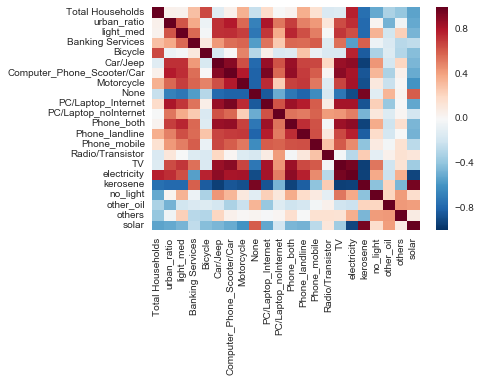

In [363]:
corrmat = feature_df.corr()
sns.heatmap(corrmat)

In [364]:
def get_plots(X_std, y_impute):
    plt.figure(figsize=(35,28))

    plt.subplot(551)
    plt.scatter(X_std[:,0], y_impute)

    plt.subplot(552)
    plt.scatter(X_std[:,1], y_impute)

    plt.subplot(553)
    plt.scatter(X_std[:,2], y_impute)

    plt.subplot(554)
    plt.scatter(X_std[:,3], y_impute)

    plt.subplot(555)
    plt.scatter(X_std[:,4], y_impute)

    plt.subplot(556)
    plt.scatter(X_std[:,5], y_impute)

    plt.subplot(557)
    plt.scatter(X_std[:,6], y_impute)

    plt.subplot(558)
    plt.scatter(X_std[:,7], y_impute)

    plt.subplot(559)
    plt.scatter(X_std[:,8], y_impute)

    plt.subplot(5,5,10)
    plt.scatter(X_std[:,9], y_impute)

    plt.subplot(5,5,11)
    plt.scatter(X_std[:,10], y_impute)

    plt.subplot(5,5,12)
    plt.scatter(X_std[:,11], y_impute)

    plt.subplot(5,5,13)
    plt.scatter(X_std[:,12], y_impute)

    plt.subplot(5,5,14)
    plt.scatter(X_std[:,13], y_impute)

    plt.subplot(5,5,15)
    plt.scatter(X_std[:,14], y_impute)

    plt.subplot(5,5,16)
    plt.scatter(X_std[:,15], y_impute)

    plt.subplot(5,5,17)
    plt.scatter(X_std[:,16], y_impute)

    plt.subplot(5,5,18)
    plt.scatter(X_std[:,17], y_impute)

    plt.subplot(5,5,19)
    plt.scatter(X_std[:,18], y_impute)

    plt.subplot(5,5,20)
    plt.scatter(X_std[:,19], y_impute)
    
    plt.subplot(5,5,21)
    plt.scatter(X_std[:,20], y_impute)

    plt.show()

In [365]:
X_raw = np.exp(X_std)
y_raw = np.exp(y_impute)

<function matplotlib.pyplot.show>

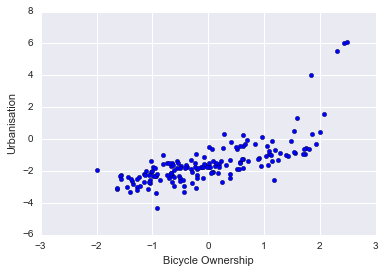

In [476]:
plt.figure()
plt.scatter(X_std[:,4], y_impute)
plt.xlabel('Bicycle Ownership')
plt.ylabel('Urbanisation')
plt.show

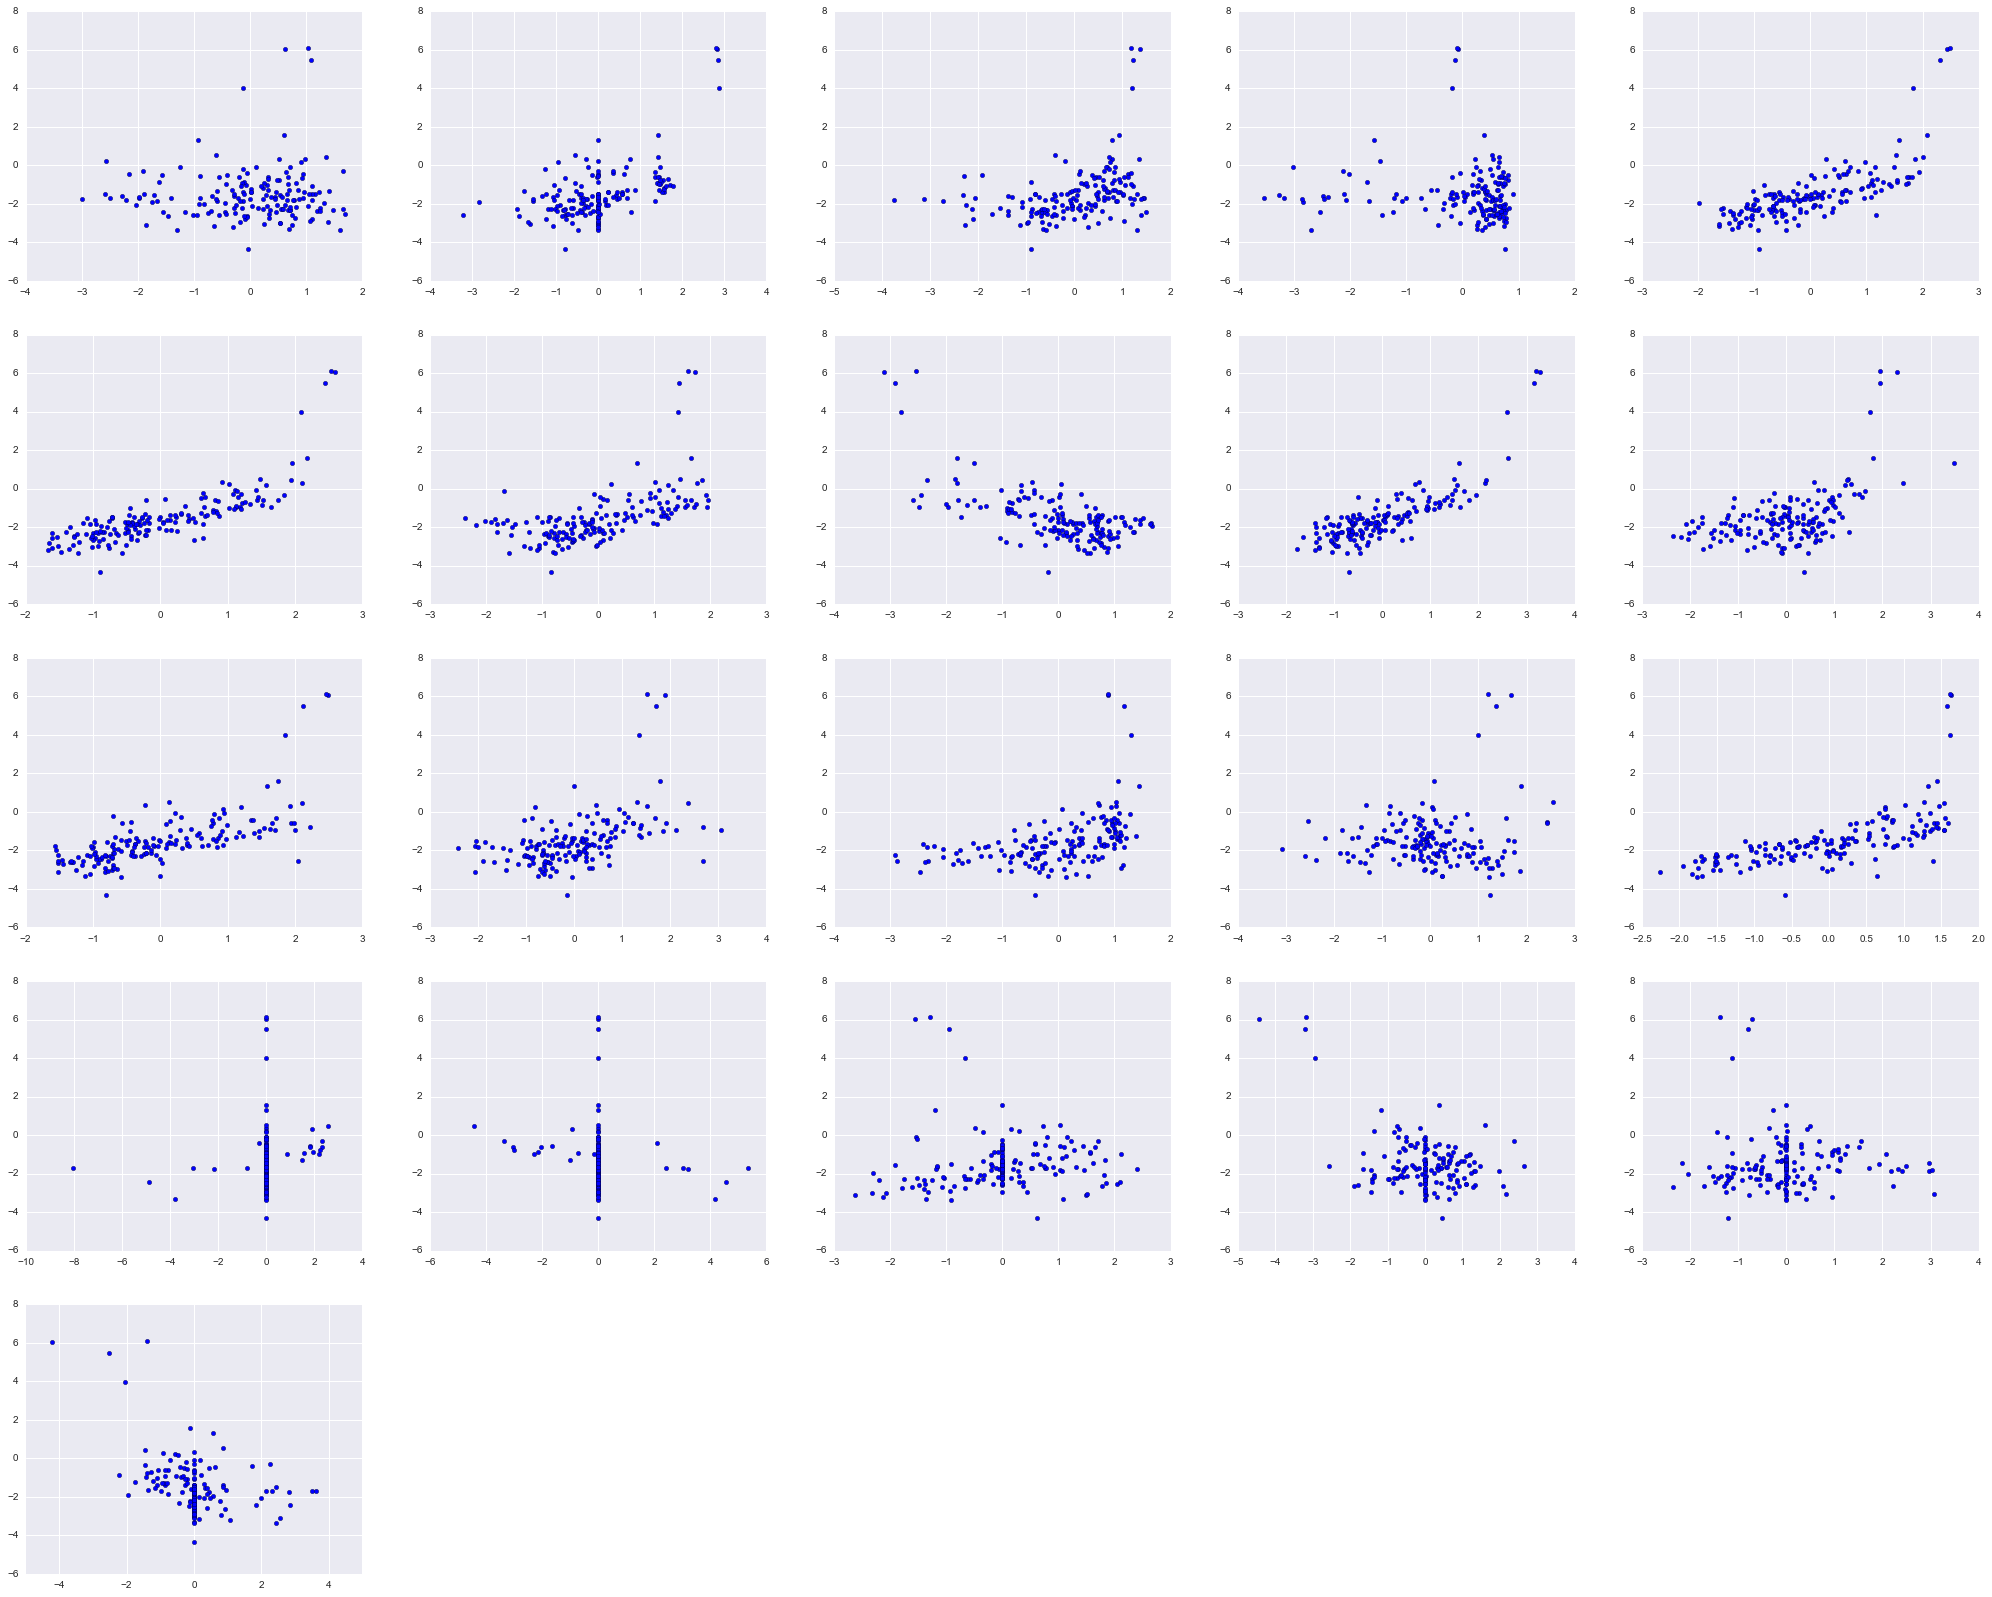

In [366]:
get_plots(X_std, y_impute)

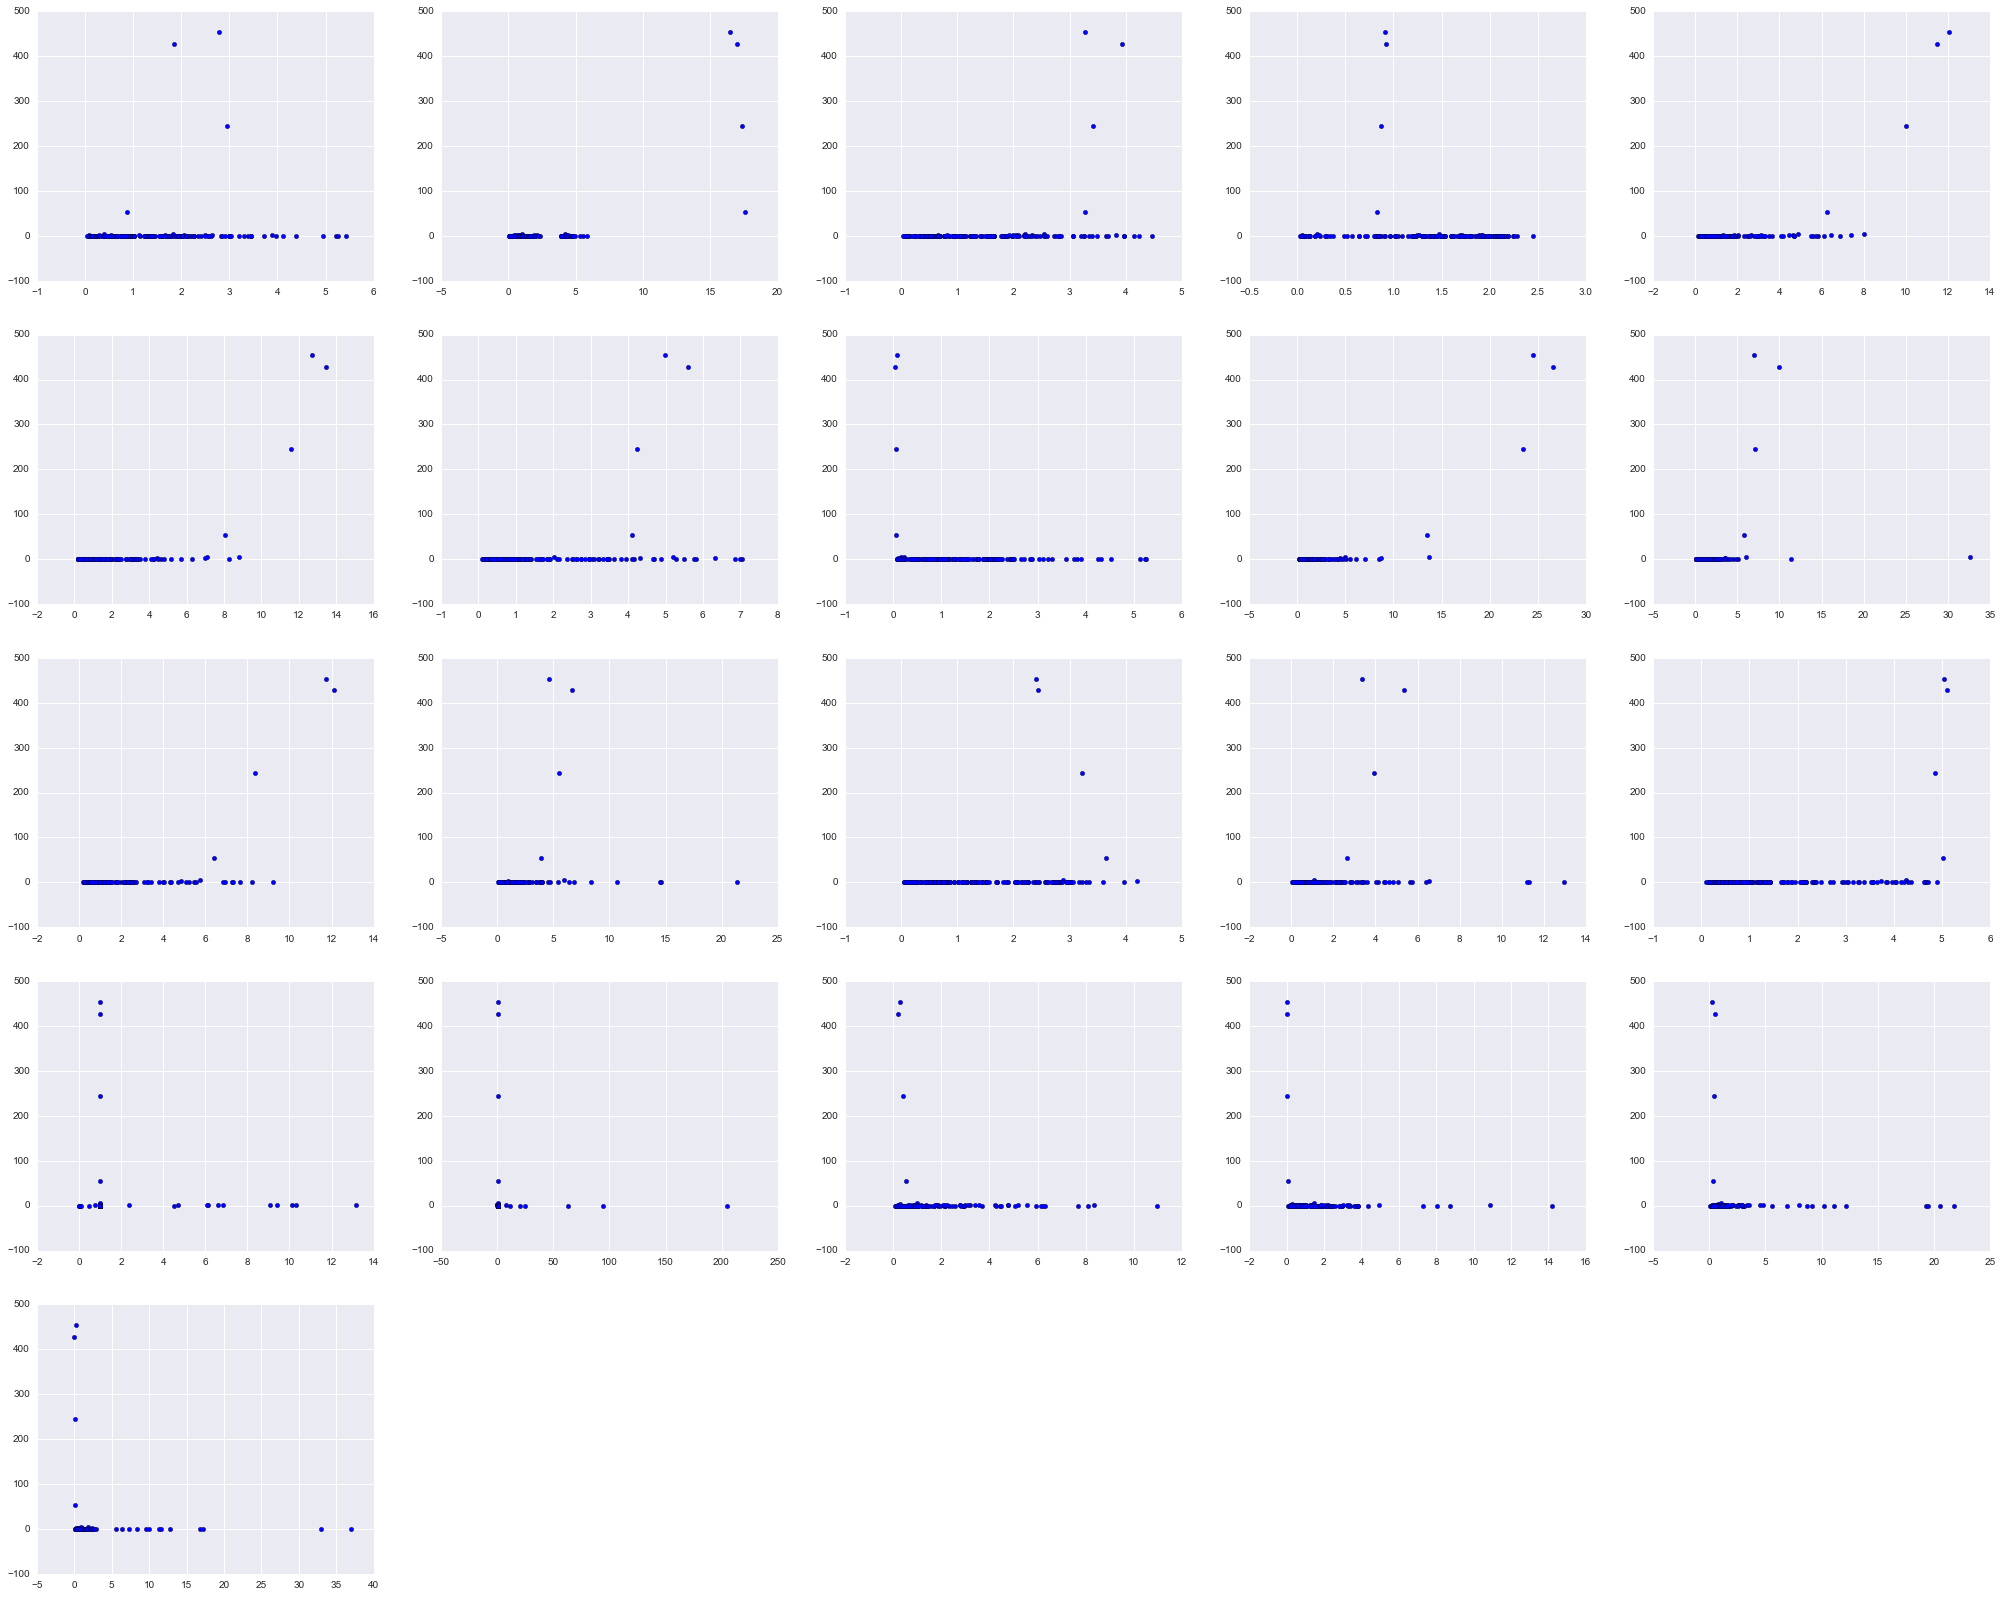

In [368]:
get_plots(X_raw, y_raw)

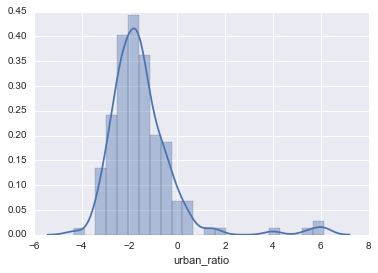

In [369]:
sns.distplot(y_impute)

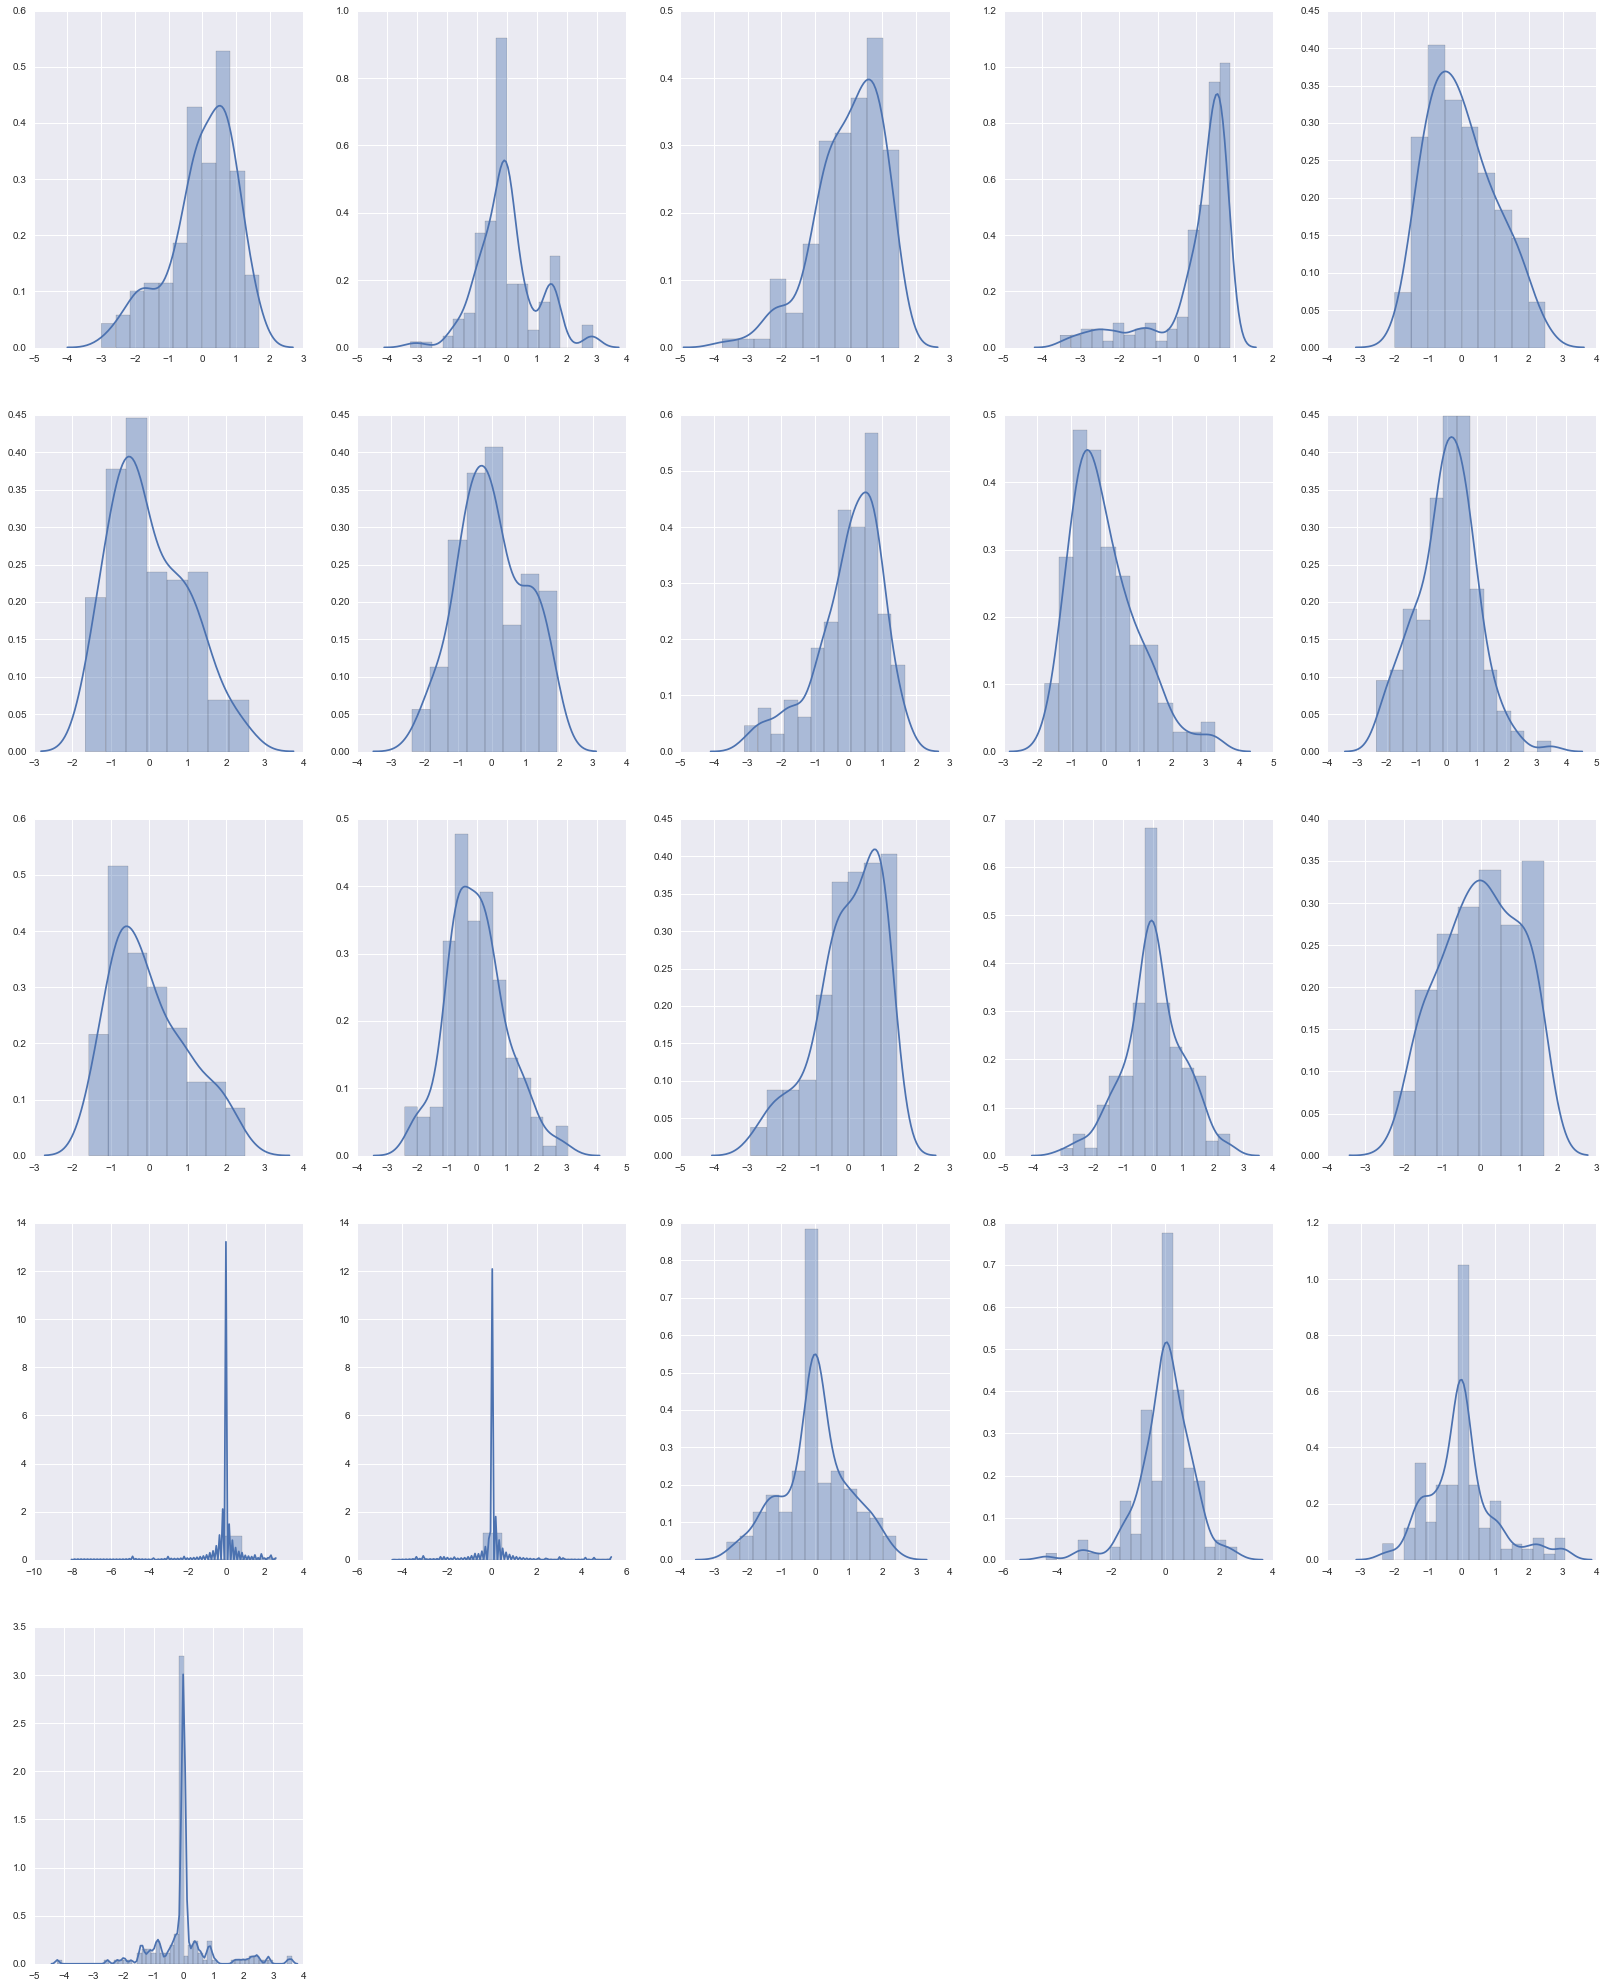

In [370]:
plt.figure(figsize=(28,35))

plt.subplot(551)
sns.distplot(X_std[:,0])

plt.subplot(552)
sns.distplot(X_std[:,1])

plt.subplot(553)
sns.distplot(X_std[:,2])

plt.subplot(554)
sns.distplot(X_std[:,3])

plt.subplot(555)
sns.distplot(X_std[:,4])

plt.subplot(556)
sns.distplot(X_std[:,5])

plt.subplot(557)
sns.distplot(X_std[:,6])

plt.subplot(558)
sns.distplot(X_std[:,7])

plt.subplot(559)
sns.distplot(X_std[:,8])

plt.subplot(5,5,10)
sns.distplot(X_std[:,9])

plt.subplot(5,5,11)
sns.distplot(X_std[:,10])

plt.subplot(5,5,12)
sns.distplot(X_std[:,11])

plt.subplot(5,5,13)
sns.distplot(X_std[:,12])

plt.subplot(5,5,14)
sns.distplot(X_std[:,13])

plt.subplot(5,5,15)
sns.distplot(X_std[:,14])

plt.subplot(5,5,16)
sns.distplot(X_std[:,15])

plt.subplot(5,5,17)
sns.distplot(X_std[:,16])

plt.subplot(5,5,18)
sns.distplot(X_std[:,17])

plt.subplot(5,5,19)
sns.distplot(X_std[:,18])

plt.subplot(5,5,20)
sns.distplot(X_std[:,19])

plt.subplot(5,5,21)
sns.distplot(X_std[:,20])

plt.show()

Predictions: PCA-LinReg, LASSO, ADABOOST, TREE, FOREST, GBOOST

In [371]:
# PCA Function

def graph_pca(X):
    n = int(X.shape[1])
    
    cov_mat = np.cov(X.T)
    eig_vals, eig_vecs = np.linalg.eig(cov_mat)
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
    eig_pairs.sort()
    eig_pairs.reverse()
    
    print('Eigenvalues in descending order:')
    for i in eig_pairs:
        print(i[0])
    
    tot = sum(eig_vals)
    var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
    cum_var_exp = np.cumsum(var_exp)

    with plt.style.context('seaborn-whitegrid'):
        plt.figure(figsize=(6, 4))

        plt.bar(range(n), var_exp, alpha=0.5, align='center',
                label='individual explained variance')
        plt.step(range(n), cum_var_exp, where='mid',
                 label='cumulative explained variance')
        plt.ylabel('Explained variance ratio')
        plt.xlabel('Principal components')
        plt.legend(loc='best')
        plt.tight_layout()
    return eig_pairs

Eigenvalues in descending order:
8.94384390283
3.27294879831
2.17103423682
1.51649497324
1.19195000713
0.706845794894
0.660989823154
0.499990772901
0.416490368455
0.386636004307
0.287484573618
0.244960347045
0.212634947352
0.190308710312
0.118606430033
0.0836392252599
0.0726971382588
0.0586046126205
0.044190012095
0.0367748596567
0.0117088175314


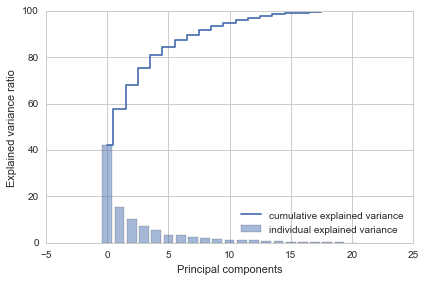

In [479]:
eig_pairs = graph_pca(X_std)

In [480]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(21,1),
                      eig_pairs[1][1].reshape(21,1),
                      eig_pairs[2][1].reshape(21,1)))

Y = X_std.dot(matrix_w)

print Y.shape

(164L, 3L)


Attempted Predictions

In [374]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.cross_validation import cross_val_score

In [481]:
# PCA+LinReg: NOT SO GOOD
lm  = LinearRegression()

scores = cross_val_score(lm, Y, y_impute, cv=10, scoring='r2')
print scores
print scores.mean()

[ 0.58335959 -0.10825402  0.64093206  0.19659417  0.07977657  0.17753767
 -0.01803561  0.64852731  0.17529995  0.48348872]
0.285922642466


In [376]:
# LASSO: BAD
lasso = Lasso()
scores = cross_val_score(lasso, X_std, y_impute, cv=10, scoring='r2')
print scores
print scores.mean()

[-0.01846513  0.17533581 -0.07262508  0.25797317  0.27974076  0.3235762
  0.15704008  0.08005852  0.26365954 -0.09009206]
0.13562018134


In [377]:
# ADABOOST: GOOD?
from sklearn.ensemble import AdaBoostRegressor
aboost = AdaBoostRegressor(n_estimators=100)

scores = cross_val_score(aboost, X_std, y_impute, cv=10, scoring='r2')
print scores
print scores.mean()

[ 0.67535555  0.41838631  0.92803314  0.70787373  0.63427108  0.80674115
  0.48868614  0.88444076  0.65608277  0.904581  ]
0.710445163211


In [378]:
# TREE: BAD
tr = DecisionTreeRegressor(max_depth=3)
scores = cross_val_score(tr, X_std, y_impute, cv=10, scoring='r2')
print scores
print scores.mean()

[ 0.623729   -3.08683125  0.91604982  0.58761616 -2.00048516  0.75695883
  0.37104912  0.75453357  0.37483903  0.90003177]
0.019749089577


In [379]:
# GRADIENT BOOST: GOOD?
from sklearn.ensemble import GradientBoostingRegressor

gboost = GradientBoostingRegressor(n_estimators=100, max_depth=3)
scores = cross_val_score(gboost, X_std, y_impute, cv=10, scoring='r2')
print scores
print scores.mean()

[ 0.74837742  0.42192391  0.88628616  0.74741455  0.62131001  0.76929332
  0.67195614  0.92704288  0.75459531  0.90988316]
0.745808286026


In [380]:
# RANDOM FOREST: GOOD?
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=100, max_depth=10)
scores = cross_val_score(forest, X_std, y_impute, cv=10, scoring='r2')
print scores
print scores.mean()

[ 0.71074131  0.49846307  0.94340664  0.78072836  0.35481338  0.8294021
  0.60224923  0.92556054  0.71112986  0.85717975]
0.721367423666


Feature Selection

In [381]:
from sklearn.feature_selection import RFECV

In [382]:
rfecv = RFECV(estimator=gboost, step=1, cv=10, scoring='r2')
rfecv.fit(X_std, y_impute)
print rfecv.grid_scores_
print rfecv.ranking_

[ 0.39704914  0.52602589  0.56907056  0.61704742  0.69036282  0.70069614
  0.69763574  0.70815784  0.74426368  0.72020645  0.7410142   0.73157436
  0.73472     0.73771501  0.72961601  0.73130342  0.72557838  0.73754681
  0.73782565  0.73669073  0.73903012]
[ 1  5  1  1  1  1  4  8  1  3  2  7 11  1  6 10 13  1  1  9 12]


In [470]:
# function to select top features using recursive RFE with cross-validation

def rfe_cv(m, x, y):
    
    rfecv = RFECV(estimator=m, step=1, cv=10, scoring='r2')
    rfecv.fit(x, y)
    
    plt.figure()
    plt.xlabel("Number of features selected")
    plt.ylabel("Cross-validation R2 score")
    plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
    plt.show()
    
    m_features = []
    print rfecv.n_features_ 
    
    for i in range(len(rfecv.ranking_)):
        if rfecv.ranking_[i] == 1:
            m_features.append(X.columns[i])
    return m_features

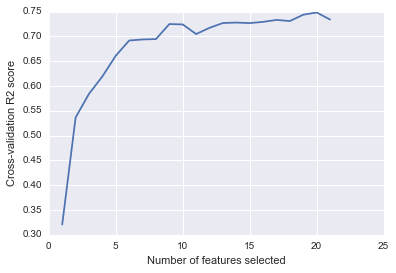

20
['Total Households', 'light_med', 'Banking Services', 'Bicycle', 'Car/Jeep', 'Computer_Phone_Scooter/Car', 'Motorcycle', 'None', 'PC/Laptop_Internet', 'PC/Laptop_noInternet', 'Phone_both', 'Phone_landline', 'Phone_mobile', 'Radio/Transistor', 'TV', 'electricity', 'no_light', 'other_oil', 'others', 'solar']


In [386]:
# not a stable selection of top features?
gboost_features = rfe_cv(gboost, X_std, y_impute)
print gboost_features

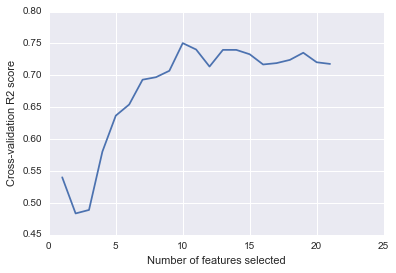

10
['light_med', 'Car/Jeep', 'Computer_Phone_Scooter/Car', 'None', 'PC/Laptop_Internet', 'PC/Laptop_noInternet', 'Phone_both', 'Radio/Transistor', 'TV', 'other_oil']


In [387]:
forest_features = rfe_cv(forest, X_std, y_impute)
print forest_features

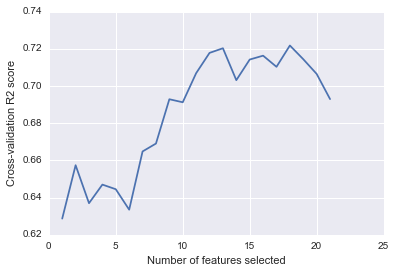

18
['Total Households', 'light_med', 'Banking Services', 'Bicycle', 'Car/Jeep', 'Computer_Phone_Scooter/Car', 'Motorcycle', 'None', 'PC/Laptop_Internet', 'PC/Laptop_noInternet', 'Phone_both', 'Phone_mobile', 'Radio/Transistor', 'TV', 'no_light', 'other_oil', 'others', 'solar']


In [388]:
aboost_features = rfe_cv(aboost, X_std, y_impute)
print aboost_features

In [443]:
forest.fit(X_std, y_impute)
for i in range(len(forest.feature_importances_)):
    if forest.feature_importances_[i] > 0.06:
        print X.columns[i]

light_med
Computer_Phone_Scooter/Car
PC/Laptop_Internet
PC/Laptop_noInternet
TV
other_oil


Drop Low Variance Features

In [447]:
X_reduce = np.delete(X_std, [15, 16, 20], 1)
print X_reduce.shape

(164L, 18L)


In [449]:
# Repeat Cross Validation

models = [forest, gboost, aboost]

for m in models:
    scores = cross_val_score(m, X_reduce, y_impute, cv=10, scoring='r2')
    print m
    print 'R2: %f'%scores.mean()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)
R2: 0.720345
GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=3, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)
R2: 0.740279
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=100, random_state=None)
R2: 0.700842


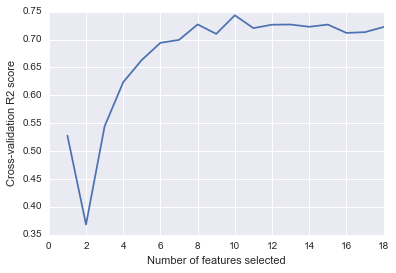

10


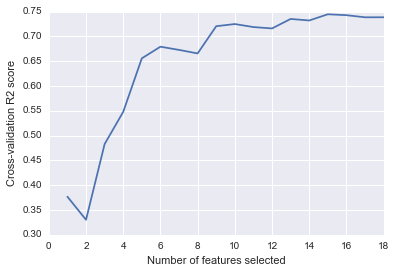

15


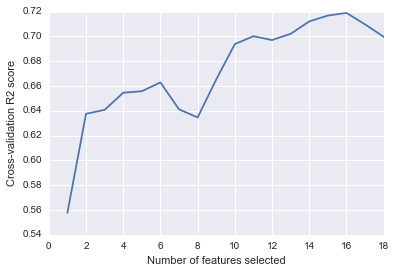

16


In [450]:
# Repeat RFECV

features = []
for m in models:
    f = rfe_cv(m, X_reduce, y_impute)
    features.append(f)

In [482]:
print features[0]

['light_med', 'Car/Jeep', 'Computer_Phone_Scooter/Car', 'None', 'PC/Laptop_Internet', 'PC/Laptop_noInternet', 'Phone_both', 'Radio/Transistor', 'TV', 'kerosene']


Clustering???

(164L, 10L)
Eigenvalues in descending order:
6.27533138963
1.29710757969
0.983851678449
0.533037518936
0.369402823408
0.265265329353
0.130797093271
0.107018731937
0.0704374736081
0.0291000749703


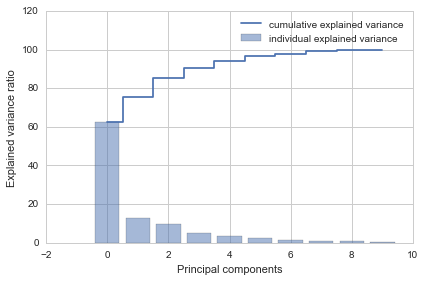

In [451]:
# First reduce dimensions of selected (forest - smallest selection) features using PCA

X_rfe = X_impute[features[0]]
X_rfe = std.fit_transform(X_rfe)

print X_rfe.shape

eig_pairs = graph_pca(X_rfe)

In [456]:
# Only the first component selected
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1)))

Y = X_rfe.dot(matrix_w)

print Y.shape

(164L,)


In [458]:
# Combine the principal component with the y data column as variables for clustering

C = np.hstack((Y.reshape(164,1), y_impute.reshape(164,1)))
print C.shape

(164L, 2L)


In [459]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 2).fit(C)
labels = km.labels_
centers = km.cluster_centers_

from sklearn import metrics
metrics.silhouette_score(C, labels)

0.59271276268871853

In [462]:
print np.exp(centers[0,0])
print np.exp(centers[1,0])


0.258494907903
26.297089544


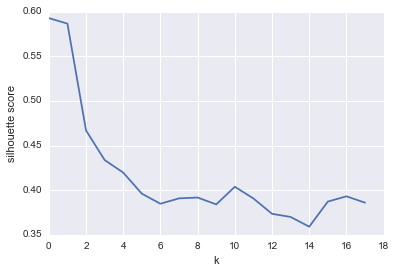

In [483]:
# (In terms of silhouette scores) Kmeans performs better than dbscan
# 2 clusters selected

nk = []
for k in range(2,20):
    res = KMeans(n_clusters = k).fit(C)
    tags = res.labels_
    sil = metrics.silhouette_score(C, tags)
    nk.append(sil)

plt.figure()
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.plot(nk)

In [469]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=3).fit(C)
db_labels = db.labels_

sil = metrics.silhouette_score(C, db_labels)
print sil

0.495860283586


In [464]:
# create an array and dataframe of the clustering variables and assigned clusters

cluster = np.hstack((Y.reshape(164,1), 
                     y_impute.reshape(164,1),
                    labels.reshape(164,1)))
cluster.shape

(164L, 3L)

In [465]:
cluster_df = pd.DataFrame(cluster)
cluster_df.columns = ['p1', 'y', 'cluster']
cluster_df.head()

,p1,y,cluster
0,4.552753,1.328205,1
1,2.173588,-0.444465,1
2,1.230009,-1.407654,1
3,-3.181574,-2.811294,0
4,-3.754336,-2.585283,0


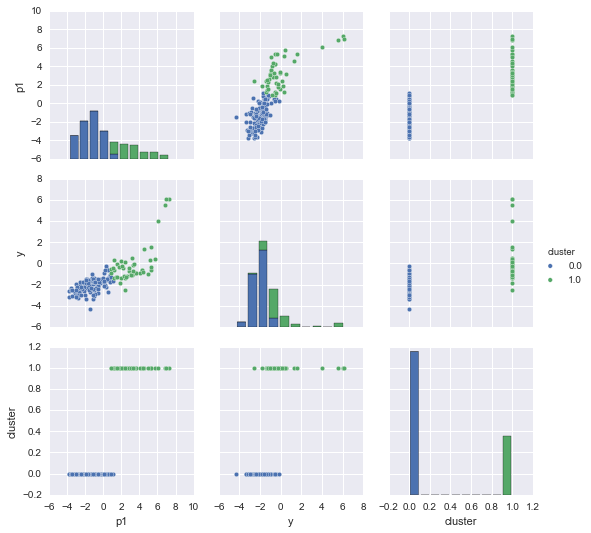

In [466]:
# visualising the clusters and the variables used for clustering

sns.pairplot(cluster_df, hue='cluster')

In [467]:
# create a dataframe of the clusters and features used before PCA

cluster_rfe = np.hstack((X_rfe, 
                     y_impute.reshape(164,1),
                    labels.reshape(164,1)))
cluster_X = pd.DataFrame(cluster_rfe)
cluster_X.columns = features[0] + ['y'] + ['cluster']

C:\Users\Rahul\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


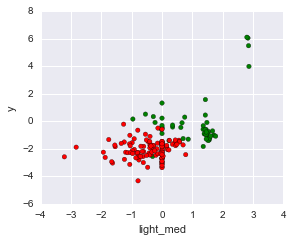

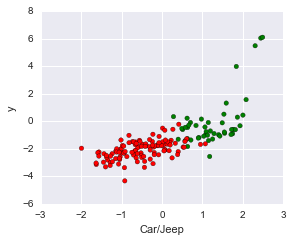

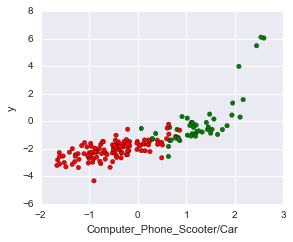

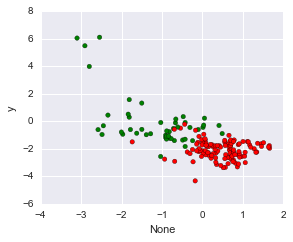

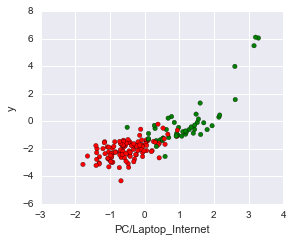

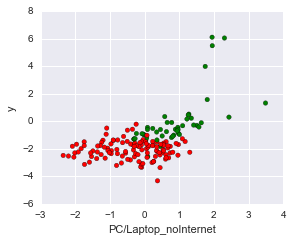

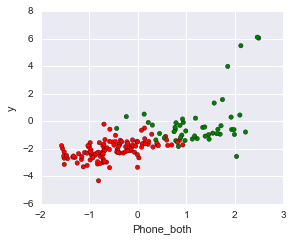

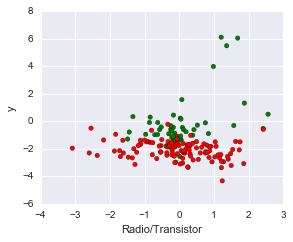

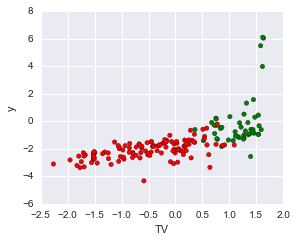

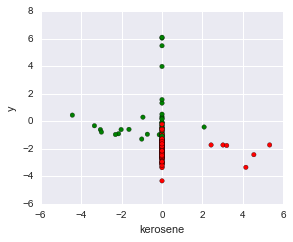

In [468]:
# plot clusters in terms of features used

colors = np.array(['red', 'green', 'blue', 'yellow'])
rfe_features = features[0]
for i in range(len(rfe_features)):
    f = rfe_features[i]
    plt.figure(figsize=(20,20))
    plt.subplot(5,4,i+1)
    plt.xlabel(f)
    plt.ylabel('y')
    plt.scatter(cluster_X[f], cluster_X['y'], c=colors[cluster_X.cluster], s=20)
    plt.show()

GDP Data... IGNORE THIS SECTION AS GDP DATA DISTRICTS HAVE A VERY SMALL OVERLAP WITH CENSUS DATA DISTRICTS

In [704]:
gdp = gdp.drop(gdp.columns[0], axis=1)

gdp.head(11)

,year,bangalorerural,belgaum,bellary,bidar,bijapur,chamarajanagar,chitradurga,dakshinakannada,dharwad,...,virudhunagar,pratapgarh.2,bageshwar,chamoli,champawat,garhwal,nainital,pithoragarh,udhamsinghnagar,uttarkashi
0,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51551.1,15761.3,2508.5,4677.7,2705.9,8183.9,13087.0,5950.9,19382.6,3450.5
1,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61664.7,17014.6,2769.0,5122.1,2956.3,9363.9,14879.1,6498.3,22162.8,3852.7
2,2002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,59511.0,18641.2,3032.8,5820.3,3204.3,10327.2,16287.8,7170.5,23578.8,4199.6
3,2003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,61930.7,18884.2,3372.1,7213.2,3782.3,13563.6,17800.6,8457.4,26116.5,4726.7
4,2004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70518.7,21379.3,3724.4,7568.2,4823.3,13642.1,19802.9,9017.8,28337.2,5309.0
5,2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,80288.1,20051.4,4354.6,9371.7,5096.8,14855.5,24044.3,10146.3,31973.0,5943.1
6,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90304.9,23429.5,4770.1,10082.0,5613.3,16342.7,26954.9,11035.1,35008.7,6632.7
7,2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,101374.1,NaN,5703.2,12509.5,6466.5,19735.1,31800.8,13441.8,43190.8,7774.2
8,2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,6458.3,14244.2,7232.9,22479.3,36170.1,15247.3,48427.3,8691.5
9,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,7265.3,15856.0,8010.0,25491.2,40719.2,17122.8,53983.9,9613.6


In [721]:
gdp_districts = []
for i in district_total['new_name']:
    if i in gdp.columns:
        b = gdp[i].loc[10]
        try:
            lb = np.log(b)
        except:
            lb = np.nan
    else:
         lb = np.nan
    gdp_districts.append(lb)

In [729]:
gdp_ratio = totals_ratio
gdp_ratio['l_gdp'] = gdp_districts

In [730]:
gdp_ratio_impute = gdp_ratio.fillna(gdp_ratio.mean())
gdp_ratio_impute.set_index(gdp_ratio_impute['index'])
gdp_ratio_impute.head()

,Area Name 6,Total/ Rural/ Urban7,Total number of households 8,Total number of households availing banking services 9,Availability of assets Radio/ Transistor 10,Availability of assets Television 11,Availability of assets Computer/Laptop With Internet 12,Availability of assets Computer/Laptop Without Internet 13,Availability of assets Telephone/Mobile PhoneLandline only 14,Availability of assets Telephone/Mobile Phone Mobile only 15,...,district,electricity,kerosene,solar,other_oil,others,no_light,light_med,index,l_gdp
575,District - Aizawl,Total,81912,0.669108,0.460897,0.723423,0.049065,0.208443,0.021621,0.771621,...,District,0.914589,0.065357,0.003748,0.000732,0.001087,0.000513,-9.5559,0,10.672788
269,District - Ajmer,Total,483931,0.765055,0.192203,0.517555,0.027894,0.058341,0.029984,0.636105,...,District,0.914589,0.065357,0.001641,0.002158,0.002333,0.003031,23.1506,1,11.653199
212,District - Alwar,Total,628913,0.594988,0.173070,0.411602,0.015503,0.057273,0.029182,0.677214,...,District,0.914589,0.065357,0.004862,0.002158,0.002333,0.003031,12.9021,2,12.122624
359,District - Araria,Total,561455,0.206164,0.223715,0.071933,0.004561,0.048508,0.015162,0.401788,...,District,0.914589,0.065357,0.004862,0.002158,0.001345,0.000422,2.9027,3,10.239996
495,District - Arwal,Total,117803,0.529554,0.303744,0.097468,0.003506,0.050635,0.015984,0.514724,...,District,0.914589,0.065357,0.004862,0.004202,0.001163,0.000390,0.0728,4,8.858896


In [142]:
l_gdp = []
count = 0

for i in district_total['new_name']:
    if i in gdp_2011.columns:
        g = np.log(gdp_2011[i].loc[11])
    else:
        g = 'NaN'
        count += 1
        
    l_gdp.append(g)
    
print count

,baksa,barpeta,bongaigaon,cachar,chirang,darrang,dhemaji,dimahasao,goalpara,golaghat,...,southtripura,bageshwar,chamoli,champawat,dehradun,garhwal,nainital,pithoragarh,udhamsinghnagar,uttarkashi
0,230955.000,166038.0000,244713.0000,198614.0000,206091.000,208779.0000,190368.000,235104.0000,194121.0000,253451.0000,...,51893.0000,427978.0000,298494.0000,220022.0000,218635.0000,446175.0000,318594.0000,374756.0000,243926.0000,236049.000
1,2.786,2.8023,7.2907,-0.5647,6.756,0.5484,5.201,-0.7774,6.0603,3.6787,...,9.4802,4.4842,5.0313,25.8399,28.0133,5.3169,15.4025,11.5003,6.9518,29.432


In [19]:
gdp_2011 = gdp[gdp['year']==2011].dropna(axis=1)
gdp_2011.head()

,year,araria,arwal,aurangabad,banka,begusarai,bhagalpur,bhojpur,darbhanga,gaya,...,karauli,kota,pali,pratapgarh,rajsamand,sawaimadhopur,sikar,sirohi,tonk,pratapgarh.1
11,2011,36285.78,8447.802,34668.914,22329.181,78204.69,67329.304,45480.26,65068.719,65287.122,...,54762.8,113446.5,105528.6,36643.8,57273.7,54730,105390.5,58527.2,59824.4,61112.5


In [49]:
print len(set(gdp_2011.columns))
print len(set(districts))

district_names = sorted(districts)

doubles = []
for i in range(len(district_names)):
    name = district_names[i]
    count = 0
    for n in district_names:
        if n == name:
            count += 1
    if count > 1:
        doubles.append(name)


doubles = list(set(doubles))
print doubles

141
344
['aurangabad', 'raigarh', 'bijapur']


In [50]:
lights2 = lights.drop(lights[doubles], axis = 1)
lights2.head()

,baksa,barpeta,bongaigaon,cachar,chirang,darrang,dhemaji,dimahasao,goalpara,golaghat,...,southtripura,bageshwar,chamoli,champawat,dehradun,garhwal,nainital,pithoragarh,udhamsinghnagar,uttarkashi
0,230955.000,166038.0000,244713.0000,198614.0000,206091.000,208779.0000,190368.000,235104.0000,194121.0000,253451.0000,...,51893.0000,427978.0000,298494.0000,220022.0000,218635.0000,446175.0000,318594.0000,374756.0000,243926.0000,236049.000
1,2.786,2.8023,7.2907,-0.5647,6.756,0.5484,5.201,-0.7774,6.0603,3.6787,...,9.4802,4.4842,5.0313,25.8399,28.0133,5.3169,15.4025,11.5003,6.9518,29.432


In [166]:
log_lights = np.log(lights2)

In [190]:
log_med = []
for i in log_lights.columns:
    log_med.append(log_lights.loc[1])
    
print len(log_med)

341


In [167]:
lights['araria'].loc[1]

gdp_y = []
lights_x = []

for i in log_lights.columns:
    if i in gdp_2011.columns:
        y = np.log(gdp_2011[i].loc[11])
        x = log_lights[i].loc[1]
        gdp_y.append(y)
        lights_x.append(x)

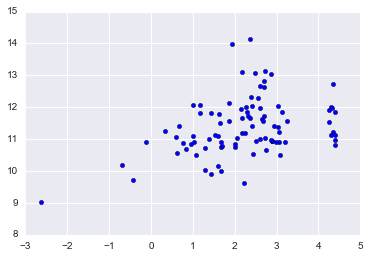

In [168]:
# Linear relationship between log-lights and log-gdp across districts
plt.scatter(lights_x, gdp_y)

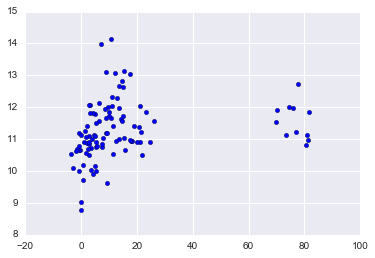

In [169]:
# not such a clear relationship between lights and log-gdp

gdp_y = []
lights_x = []

for i in lights2.columns:
    if i in gdp_2011.columns:
        y = np.log(gdp_2011[i].loc[11])
        x = lights2[i].loc[1]
        gdp_y.append(y)
        lights_x.append(x)

plt.scatter(lights_x, gdp_y)

In [726]:
print gdp_ratio_impute.shape
print gdp_ratio_impute.columns

(164, 27)
Index([u'Area Name 6', u'Total/ Rural/ Urban7',
       u'Total number of households 8',
       u'Total number of households availing banking services  9',
       u'Availability of assets Radio/\r\nTransistor 10',
       u'Availability of assets Television 11',
       u'Availability of assets Computer/Laptop With Internet 12',
       u'Availability of assets Computer/Laptop Without Internet 13',
       u'Availability of assets Telephone/Mobile PhoneLandline only 14',
       u'Availability of assets Telephone/Mobile Phone Mobile only 15',
       u'Availability of assets Telephone/Mobile Phone Both 16',
       u'Availability of assets Bicycle 17',
       u'Availability of assets Scooter/ Motorcycle/Moped 18',
       u'Availability of assets Car/ Jeep/Van 19',
       u'Availability of assets Households with TV, Computer/Laptop, Telephone/mobile phone and Scooter/ Car 20',
       u'Availability of assets None of the assets specified in col.21',
       u'new_name', u'district', u'e

In [735]:
y2 = gdp_ratio_impute[gdp_ratio_impute.columns[-1]]
x2_cols = gdp_ratio_impute.columns[2:16] + gdp_ratio_impute.columns[18:25]
X2 = gdp_ratio_impute[x2_cols]

C:\Users\Rahul\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: using '+' to provide set union with Indexes is deprecated, use '|' or .union()
  from ipykernel import kernelapp as app


In [780]:
print len(x2_cols)

21


In [777]:
X2_std = std.fit_transform(X2)
forest = RandomForestRegressor(n_estimators=50, max_depth=7)
scores = cross_val_score(forest, X2_std, y2, cv=3, scoring='r2')
print scores
print scores.mean()

[ 0.33996384  0.19614077  0.40191751]
0.312674041555


In [767]:
gboost = GradientBoostingRegressor(n_estimators=100, max_depth=2)
scores = cross_val_score(gboost, X2_std, y2, cv=3, scoring='r2')
print scores
print scores.mean()

[ 0.48074075  0.34090126  0.53383953]
0.451827177233


In [765]:
aboost = AdaBoostRegressor(n_estimators=100)
scores = cross_val_score(aboost, X2_std, y2, cv=3, scoring='r2')
print scores
print scores.mean()

[ 0.38600377  0.38281663  0.36407082]
0.377630405875


In [773]:
# bad
tr = DecisionTreeRegressor(max_depth=5)
scores = cross_val_score(tr, X2_std, y2, cv=3, scoring='r2')
print scores
print scores.mean()

[-0.06385889 -0.56390014 -0.33399589]
-0.32058496957


In [779]:
# bad
lasso = Lasso()
scores = cross_val_score(lasso, X2_std, y2, cv=3, scoring='r2')
print scores
print scores.mean()

[-0.00617107 -0.0022048  -0.00173248]
-0.00336945241815


Eigenvalues in descending order:
8.4279031459
3.02583680752
2.37017507103
1.49604575434
1.29936403845
0.857712685995
0.779548755038
0.653731677052
0.486975280275
0.393811653552
0.369146150064
0.261839696253
0.212126983184
0.176115941103
0.10755377197
0.0773732970689
0.0636402364744
0.0405957176733
0.0210799919682
0.00445862900166
0.00379907191831


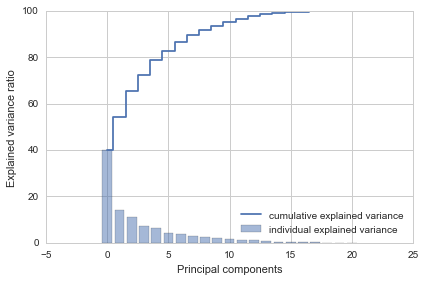

In [782]:
cov_mat = np.cov(X2_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

eig_pairs.sort()
eig_pairs.reverse()

print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])
    
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(21), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.step(range(21), cum_var_exp, where='mid',
             label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [783]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(21,1),
                      eig_pairs[1][1].reshape(21,1),
                      eig_pairs[2][1].reshape(21,1),
                      eig_pairs[3][1].reshape(21,1),
                      eig_pairs[4][1].reshape(21,1)))

Y = X2_std.dot(matrix_w)

print Y.shape

(164L, 5L)


In [784]:
scores = cross_val_score(lm, Y, y2, cv=3, scoring='r2')
print scores
print scores.mean()

[ 0.02943522  0.25911197  0.09981411]
0.129453763603
